<a href="https://colab.research.google.com/github/LFGuzman2105/proyecto_sp1_IA/blob/master/proyecto_IA_dermatologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

In [2]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/ml/datasets/Dermatology
'''

# Retrieve the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

--2025-05-27 02:19:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dermatology.data’

dermatology.data        [ <=>                ]  25.36K  --.-KB/s    in 0.01s   

2025-05-27 02:19:10 (1.95 MB/s) - ‘dermatology.data’ saved [25964]



In [3]:
# Retrieve the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names

--2025-05-27 02:19:11--  https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dermatology.names’

dermatology.names       [ <=>                ]   4.54K  --.-KB/s    in 0s      

2025-05-27 02:19:11 (58.3 MB/s) - ‘dermatology.names’ saved [4652]



In [4]:

# Loading Dataset and have a glimpse about it
column_names = ['erythema',
                'scaling',
                'definite-borders',
                'itching',
                'koebner phenomenon',
                'polygonal papules',
                'follicular papules',
                'oral-mucosal involvement',
                'knee elbow involvement',
                'scalp involvement',
                'family history',
                'melanin incontinence',
                'eosinophils in the infiltrate',
                'pnl infiltrate',
                'fibrosis of the papillary dermis',
                'exocytosis',
                'acanthosis',
                'hyperkeratosis',
                'parakeratosis',
                'clubbing of the rete ridges',
                'elongation of the rete ridges',
                'thinning of the suprapapillary epidermis',
                'spongiform pustule',
                'munro microabcess',
                'focal hypergranulosis',
                'disappearance of the granular layer',
                'vacuolisation and damage of the basal layer',
                'spongiosis',
                'saw-tooth appearance of retes',
                'follicular horn plug',
                'perifollicular parakeratosis',
                'inflammatory monoluclear infiltrate',
                'band-like infiltrate',
                'age',
                'class']

raw_dataset = pd.read_csv("dermatology.data",
                          names=column_names,
                          na_values = "?",
                          comment='\t',
                          sep=",",
                          skipinitialspace=True)

# Brief Statistical Summary of the dataset
raw_dataset.describe()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [5]:
# Lets check columns
raw_dataset.columns

Index(['erythema', 'scaling', 'definite-borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral-mucosal involvement', 'knee elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'pnl infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of the basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear infiltrate',
       'band-like infiltrate', 'age', 'class'],
      dtype='object')

In [6]:
# Summary of the dataset
raw_dataset.head()

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [7]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

(366, 35)

In [8]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges                    0
elongation of the re

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


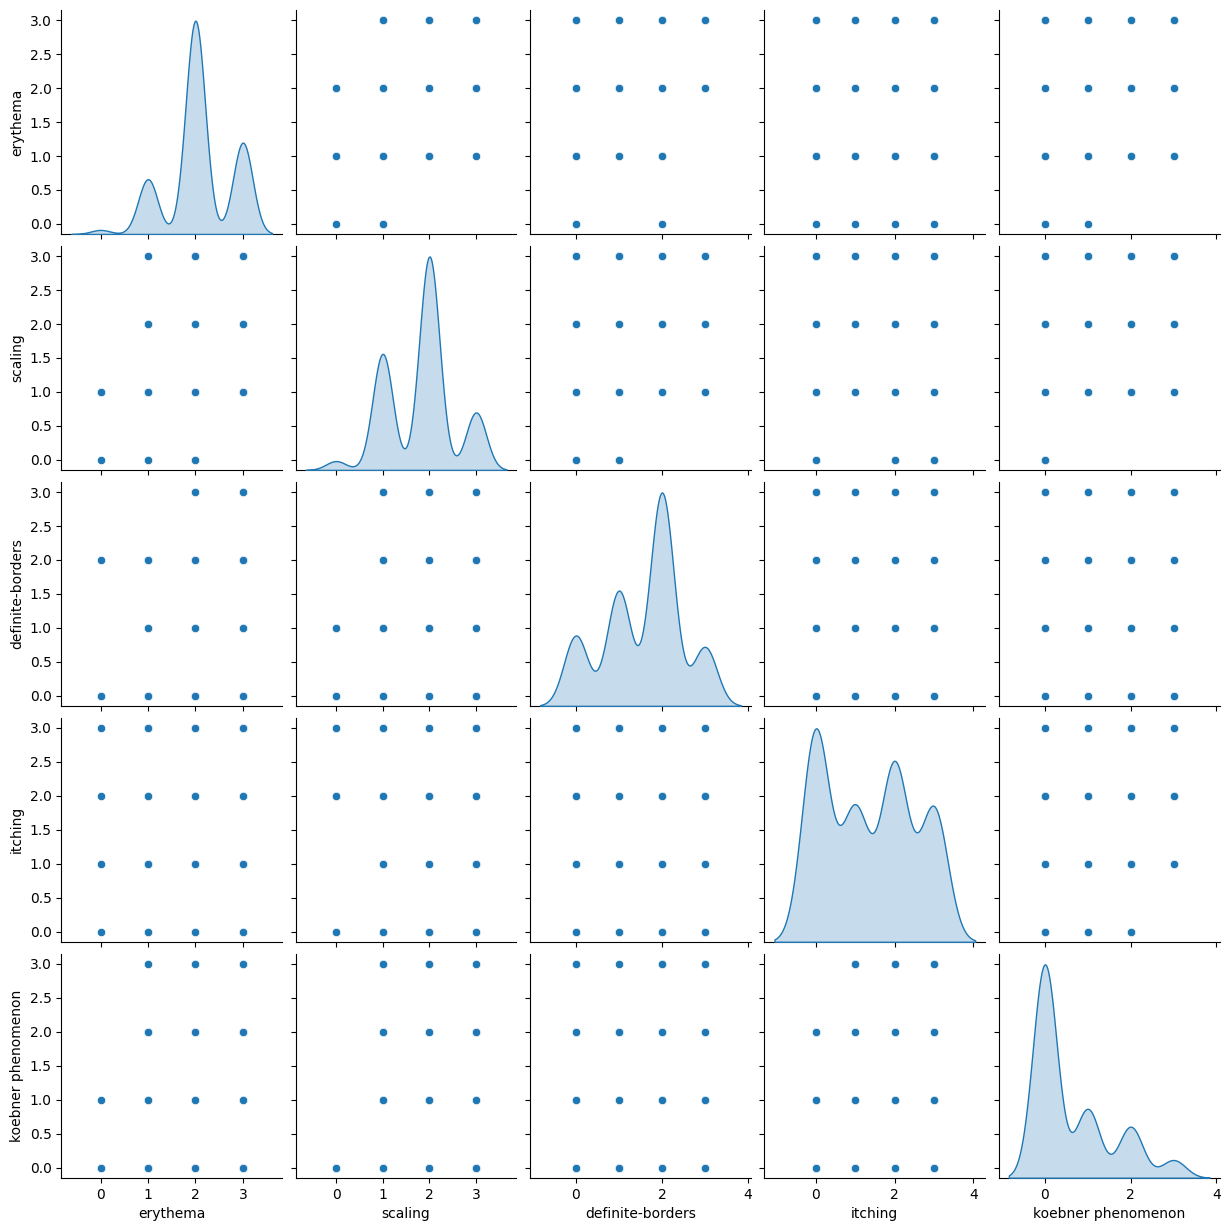

In [9]:
# Lets visualize the data
'''
sns.pairplot(new_dataset[['erythema',
                          'scaling',
                          'definite-borders',
                          'itching',
                          'koebner phenomenon',
                          'polygonal papules',
                          'follicular papules',
                          'oral-mucosal involvement',
                          'knee elbow involvement',
                          'scalp involvement',
                          'family history',
                          'melanin incontinence',
                          'eosinophils in the infiltrate',
                          'pnl infiltrate',
                          'fibrosis of the papillary dermis',
                          'exocytosis',
                          'acanthosis',
                          'hyperkeratosis',
                          'parakeratosis',
                          'clubbing of the rete ridges',
                          'elongation of the rete ridges',
                          'thinning of the suprapapillary epidermis',
                          'spongiform pustule',
                          'munro microabcess',
                          'focal hypergranulosis',
                          'disappearance of the granular layer',
                          'vacuolisation and damage of the basal layer',
                          'spongiosis',
                          'saw-tooth appearance of retes',
                          'follicular horn plug',
                          'perifollicular parakeratosis',
                          'inflammatory monoluclear infiltrate',
                          'band-like infiltrate',
                          'age',
                          'class']], diag_kind="kde")
'''

sns.pairplot(new_dataset[['erythema',
                          'scaling',
                          'definite-borders',
                          'itching',
                          'koebner phenomenon']], diag_kind="kde")

In [10]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# Hint: Make sure you select only numerical variables.
# Feel free to choose the number you want and the dependent variables is class
independent_variables = ['erythema',
                          'scaling',
                          'definite-borders',
                          'itching',
                          'koebner phenomenon',
                          'polygonal papules',
                          'follicular papules',
                          'oral-mucosal involvement',
                          'knee elbow involvement',
                          'scalp involvement',
                          'family history',
                          'melanin incontinence',
                          'eosinophils in the infiltrate',
                          'pnl infiltrate',
                          'fibrosis of the papillary dermis',
                          'exocytosis',
                          'acanthosis',
                          'hyperkeratosis',
                          'parakeratosis',
                          'clubbing of the rete ridges',
                          'elongation of the rete ridges',
                          'thinning of the suprapapillary epidermis',
                          'spongiform pustule',
                          'munro microabcess',
                          'focal hypergranulosis',
                          'disappearance of the granular layer',
                          'vacuolisation and damage of the basal layer',
                          'spongiosis',
                          'saw-tooth appearance of retes',
                          'follicular horn plug',
                          'perifollicular parakeratosis',
                          'inflammatory monoluclear infiltrate',
                          'band-like infiltrate',
                          'age']
dependent_variables = ['class']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [11]:
train_target, test_target

(     class
 4        3
 316      3
 347      6
 145      3
 169      3
 ..     ...
 229      2
 312      3
 325      4
 102      1
 166      1
 
 [286 rows x 1 columns],
      class
 141      1
 361      4
 249      3
 228      5
 299      5
 ..     ...
 62       5
 110      1
 288      3
 314      3
 131      1
 
 [72 rows x 1 columns])

In [12]:
# NNs can't understand strings, we have to ENCODE them!
train_target = pd.factorize(train_target['class'])[0]
test_target = pd.factorize(test_target['class'])[0]

train_target, test_target

(array([0, 0, 1, 0, 0, 0, 2, 3, 2, 4, 0, 0, 0, 1, 4, 2, 2, 2, 2, 3, 4, 2,
        2, 2, 2, 2, 4, 2, 3, 1, 2, 2, 5, 0, 3, 2, 2, 2, 2, 2, 0, 5, 4, 5,
        2, 5, 4, 4, 0, 2, 0, 2, 2, 0, 5, 0, 2, 2, 5, 0, 5, 2, 4, 2, 5, 2,
        0, 1, 2, 4, 2, 0, 5, 2, 2, 0, 2, 0, 4, 4, 1, 4, 2, 2, 0, 0, 3, 2,
        0, 5, 3, 0, 4, 5, 2, 0, 0, 5, 4, 4, 4, 2, 2, 0, 5, 2, 2, 2, 5, 3,
        1, 3, 1, 5, 1, 5, 2, 5, 2, 4, 2, 2, 2, 0, 1, 3, 3, 4, 4, 0, 0, 0,
        5, 2, 3, 2, 4, 2, 3, 5, 2, 3, 0, 3, 0, 1, 2, 2, 2, 3, 2, 4, 1, 5,
        2, 3, 3, 4, 3, 4, 4, 3, 0, 5, 0, 0, 0, 5, 1, 5, 3, 5, 3, 2, 0, 3,
        1, 0, 2, 5, 5, 2, 4, 0, 0, 2, 3, 4, 2, 5, 4, 3, 5, 3, 0, 2, 1, 0,
        3, 4, 3, 0, 2, 0, 0, 4, 0, 5, 0, 4, 2, 0, 1, 0, 2, 2, 5, 4, 0, 3,
        4, 3, 5, 3, 2, 3, 2, 2, 0, 1, 5, 5, 2, 2, 5, 5, 5, 3, 5, 4, 4, 2,
        0, 0, 2, 5, 0, 2, 2, 1, 5, 5, 5, 2, 5, 4, 3, 2, 2, 2, 2, 3, 5, 4,
        2, 2, 4, 5, 1, 1, 4, 4, 2, 0, 3, 2, 3, 4, 5, 5, 2, 5, 0, 4, 2, 2]),
 array([0, 1, 2, 3, 3, 0, 0, 4, 2, 4

In [13]:
# Build your model!
model = tf.keras.models.Sequential([
          tf.keras.layers.InputLayer(shape=(len(independent_variables), )),
          tf.keras.layers.Dense(units=64, activation='relu'),
          tf.keras.layers.Dense(units=32, activation='relu'),
          tf.keras.layers.Dense(units=16, activation='relu'),
          tf.keras.layers.Dense(units=6, activation='softmax')
        ])
# Hint: Is this a binary or multiclassification problem?
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Now compile the model!
model.fit(train_set,
          train_target,
          epochs=50,
          batch_size = 8,
          validation_split=0.1
          )

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3409 - loss: 3.7828 - val_accuracy: 0.5862 - val_loss: 1.3380
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5475 - loss: 1.2535 - val_accuracy: 0.7241 - val_loss: 0.9666
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6683 - loss: 0.9716 - val_accuracy: 0.7931 - val_loss: 0.8065
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7612 - val_accuracy: 0.7586 - val_loss: 0.6926
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7570 - loss: 0.6740 - val_accuracy: 0.7931 - val_loss: 0.5741
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8116 - loss: 0.5340 - val_accuracy: 0.8276 - val_loss: 0.5005
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8959 - loss: 0.4636 - val_accuracy: 0.7931 - val_loss: 0.4233
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8664 - loss: 0.4258 - val_accuracy: 0.9655 - val_loss

In [16]:
# Evaluate your model
loss, acuraccy = model.evaluate(x=test_set, y=test_target, batch_size=8)
print("Acurracy: ", acuraccy)
print("Loss: ", loss)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2391 - loss: 9.1489 
Acurracy:  0.2083333283662796
Loss:  9.708892822265625


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


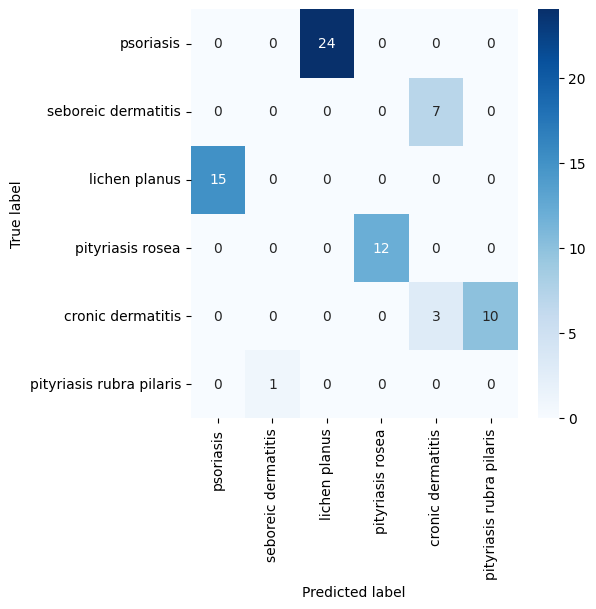

In [15]:
"""
Database:  Dermatology

       Class code:   Class:                   Number of instances:
       0             psoriasis			          112
       1             seboreic dermatitis      61
       2             lichen planus            72
       3             pityriasis rosea         49
       4             cronic dermatitis        52
       5             pityriasis rubra pilaris 20
"""

data_labels = ['psoriasis',
               'seboreic dermatitis',
               'lichen planus',
               'pityriasis rosea',
               'cronic dermatitis',
               'pityriasis rubra pilaris']

# Function that plots confusion matrix
# The confusion_matrix function in TensorFlow expects numerical labels (class indices), not string names.
# We will pass the true numerical labels (test_target) to the function.
def plot_confusion_matrix(true_labels, predictions, class_names):
  figure = plt.figure(figsize=(6, 6)) # Increased figure size for better readability
  # Use the true numerical labels for the confusion matrix calculation
  cm = confusion_matrix(labels=true_labels, predictions=predictions)
  # Use the class names for the heatmap annotations for clarity
  sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=class_names, yticklabels=class_names)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
# Get the predicted class indices
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set)))

# Plot the confusion matrix using the true numerical test_target and the predicted class indices
# The string class_names are passed to the heatmap for labeling the axes.
plot_confusion_matrix(true_labels=test_target, predictions=predictions, class_names=data_labels)